# **Série de Travaux Pratiques N° 4 : Regréssion Multiple et Regréssion Polynomiale**

# **Partie II : Regréssion Polynomiale**

- La régression multiple est comme la régression linéaire, mais avec plus d'une valeur indépendante, ce qui signifie que nous essayons de prédire une valeur basée sur deux variables ou plus.

- L’ensemble de données ci-dessous contient des informations sur les voitures.
- Nous pouvons prédire les émissions de CO2 d’une voiture en fonction de la taille du moteur, mais avec la régression multiple, nous pouvons intégrer davantage de variables, comme le poids de la voiture, pour rendre la prédiction plus précise.

### **Question 1**

1)- Lisez le fichier "data.csv"renvoyez un objet DataFrame et afficher le dataset avec head()

In [1]:
# Importer la bibliothèque pandas pour la manipulation et l'analyse de données
import pandas as pd
# Charger le fichier CSV dans un objet DataFrame
df = pd.read_csv('data.csv')
# Afficher les cinq premières lignes du DataFrame
print(df.head())

          Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105


### **Question 2**

2)- Faites ensuite une dataframe des valeurs indépendantes (Volume et Wheight) et appelez cette variable X.

In [2]:
# Sélectionner les colonnes 'Volume' et 'Weight' du df et les stocker dans la variable X
X = df[['Volume', 'Weight']]

### **Question 3**

3)- Mettez les valeurs dépendantes (CO2) dans une variable appelée y.






In [3]:
# Sélectionner la colonne 'CO2' du df et le stocker dans la variable Y
y = df['CO2']

### **Question 4**

4)- À partir du module sklearn, utlisez la méthode LinearRegression() pour créer un objet de régression linéaire.

In [4]:
# Importer la classe LinearRegression du module linear_model de la bibliothèque scikit-learn
from sklearn.linear_model import LinearRegression
# Une instance de la classe LinearRegression
model = LinearRegression()

### **Question 5**

5)- Cet objet possède une méthode appelée fit() qui prend les valeurs indépendantes **X** et dépendantes **y** comme paramètres et remplit l'objet de régression avec des données décrivant la relation :


In [5]:
# Entraîner le modèle de régression linéaire en utilisant les données d'entraînement X et les valeurs cibles y
model.fit(X, y)

LinearRegression()

### **Question 6**

6)- Nous disposons désormais d'un objet de régression prêt à prédire les valeurs de CO2 en fonction du poids et du volume d'une voiture. On veut prédire combien de grammes de CO2 est dégagés pour chaque kilomètre parcouru pour une voiture équipée d’un moteur de 1,3 litre (1300 ml) et pesant 2300 kg (utiliser la fonction predict).

In [6]:
# Caractéristiques de la nouvelle voiture 
car = [[1300, 2300]]
# Utiliser le modèle entraîné pour prédire les émissions de CO2
CO2 = model.predict(car)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Question 7**

7)- Le coefficient est un facteur qui décrit la relation avec une variable inconnue.

Exemple : si x est une variable, alors 2x vaut x deux fois. x est la variable inconnue et le chiffre 2 est le coefficient.

Dans ce cas, on peut demander la valeur du coefficient poids par rapport au CO2, et du volume par rapport au CO2. La ou les réponses que nous obtenons nous indiquent ce qui se passerait si nous augmentions ou diminuions l’une des valeurs indépendantes.

In [8]:
# le coefficient associé à la caractéristique 'Volume'
coef_volume = model.coef_[0]
# le coefficient associé à la caractéristique 'Poids'
coef_poids = model.coef_[1]

# **Partie II : Regréssion Polynomiale**

### **Question 1**

1- Importer les librairies : numpy, matplotlib, sklearn.

In [9]:
# Importer numpy pour les calculs numériques et les opérations sur les tableaux
import numpy as np
# Importer matplotlib.pyplot pour créer les visualisations
import matplotlib.pyplot as plt
# Importer la fonction make_regression du module datasets de la bibliothèque sklearn
from sklearn.datasets import make_regression
# Importer la classe SGDRegressor du module linear_model de la bibliothèque sklearn pour effectuer une régression linéaire
from sklearn.linear_model import SGDRegressor
# Importer la classe PolynomialFeatures du module preprocessing de la bibliothèque sklearn
from sklearn.preprocessing import PolynomialFeatures

### **Question 2**

2- Créer votre dataset en important la fonction datasets.make_regression et utilisez la pour générer un problème de régression aléatoire de 100 exemples avec une seule variable avec y=x^2

In [10]:
# Fixer la graine aléatoire pour la reproductibilité des résultats
np.random.seed(0)
# Générer des données de régression avec une seule caractéristique et du bruit
X, y = make_regression(n_samples=100, n_features=1, noise=10)
# Modifier les valeurs de Y pour être au carré
y = y**2
# Des fonctionnalités polynomiales de degré 2 à partir X
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X = poly_features.fit_transform(X)

### **Question 3**

3- Visualiser vos données en utilisant la fonction plt.scatter(x, y).

(100, 2)

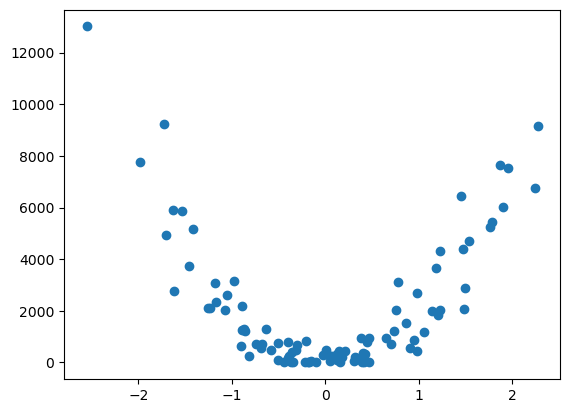

In [11]:
# Créer des points pour visualiser les données de régression
plt.scatter(X[:, 0], y)
# Afficher la forme du X
X.shape

### **Question 4**

4- Définir votre modèle avec SGDRegressor() sur 100 itérations avec un Learning rate de 0.0001.

In [12]:
# Créer une instance de SGDRegressor avec 100 itérations et un taux d'apprentissage de 0.0001
model = SGDRegressor(max_iter=100, eta0=0.0001)

### **Question 5**

5- Entraîner votre modèle en utilisant la méthode fit().

In [13]:
# Entraîner le modèle de régression linéaire en utilisant les données d'entraînement X et les valeurs cibles y
model.fit(X, y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100)

### **Question 6**

6- Calculer la précision de votre modèle en utilisant la fonction score qui calcule le coefficient de détermination entre le modèle et les valeurs y de votre Dataset.

In [14]:
# Calculer et afficher le coefficient de détermination du modèle entraîné
print('Coeff R2 =', model.score(X, y))

Coeff R2 = 0.2386988653687795


### **Question 7**

7- Faire de nouvelles prédictions avec la fonction predict() et tracer les résultats.

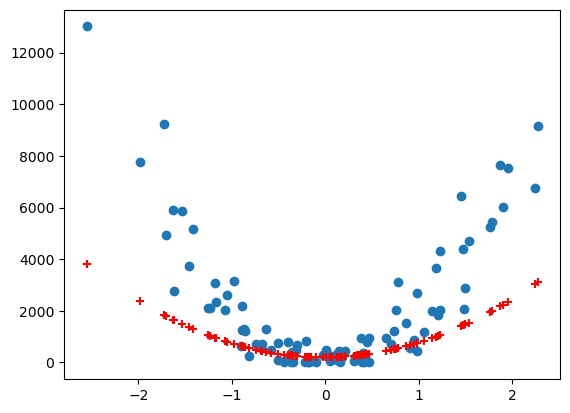

In [15]:
# Afficher les données d'entraînement sous forme des points en bleu
plt.scatter(X[:, 0], y, marker='o')
# Afficher les prédictions du modèle sous forme des points en rouge
plt.scatter(X[:, 0], model.predict(X), c='red', marker='+')

### **Question 8**

8- Refaire le même travail en entraînant votre modèle sur 1000 itérations avec un Learning rate de 0.001.

Coeff R2 = 0.8940618874083447


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


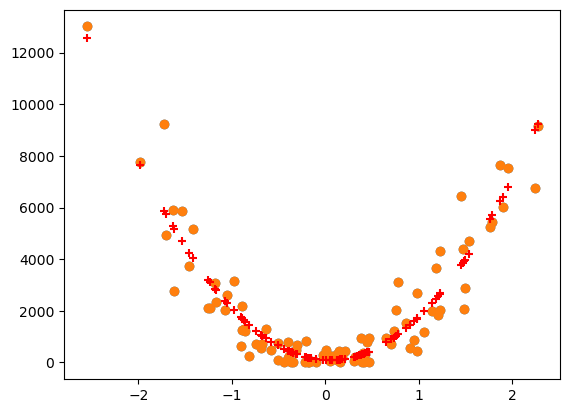

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(0)
X, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y**2
poly_features =  PolynomialFeatures(degree=2, include_bias=False)
X = poly_features.fit_transform(X)
plt.scatter(X[:,0], y)
X.shape
model = SGDRegressor(max_iter=1000, eta0=0.001)
model.fit(X,y)
print('Coeff R2 =', model.score(X, y))
plt.scatter(X[:,0], y, marker='o')
plt.scatter(X[:,0], model.predict(X), c='red', marker='+')